In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow torch torchvision


In [ ]:
import os
import pandas as pd
from PIL import Image
from torchvision import transforms
from tqdm.auto import tqdm



In [ ]:
# Define the transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a uniform size
    transforms.ToTensor(),          # Convert image to tensor and normalize
])


In [ ]:
# Directory where images are stored
image_dir = '/content/drive/MyDrive/data mining/project/flickr30k_images/flickr30k_images'

# Get a list of all image file names
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Define the batch size
batch_size = 100  # Adjust as needed

# Process images in batches
for i in tqdm(range(0, len(image_files), batch_size)):
    batch_files = image_files[i:i + batch_size]
    for filename in batch_files:
        file_path = os.path.join(image_dir, filename)
        try:
            with Image.open(file_path) as img:
                # Apply the transformation
                transformed_img = transform(img)

        except Exception as e:
            print(f"Error processing {filename}: {e}")


  0%|          | 0/318 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

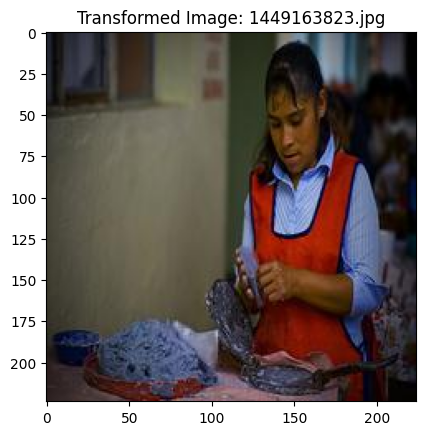

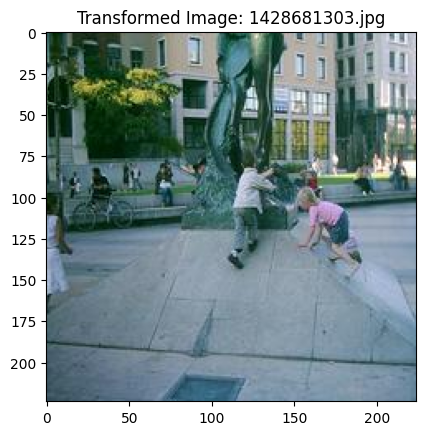

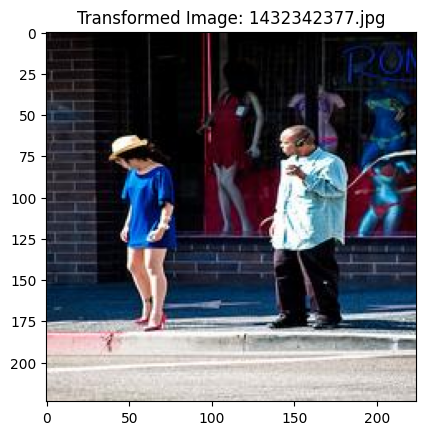

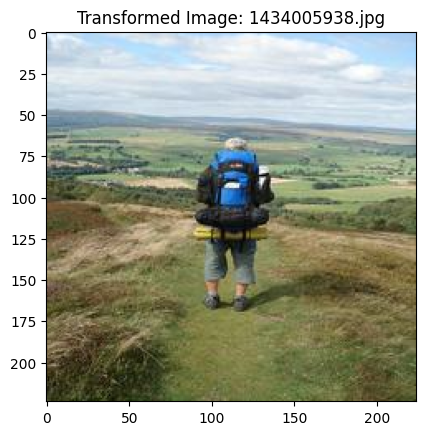

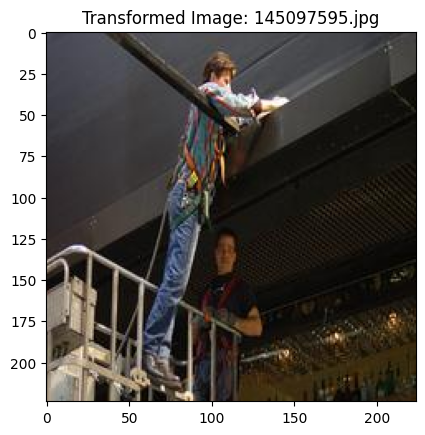

In [ ]:
import matplotlib.pyplot as plt
# Counter for how many images have been displayed
displayed_images = 0

# Define the number of images you want to display
num_images_to_display = 5

# Process images in batches
for i in tqdm(range(0, len(image_files), batch_size)):
    batch_files = image_files[i:i + batch_size]
    for filename in batch_files:
        # Check if we have already displayed 5 images
        if displayed_images >= num_images_to_display:
            break

        file_path = os.path.join(image_dir, filename)
        try:
            with Image.open(file_path) as img:
                # Apply the transformation
                transformed_img = transform(img)

                # Display the image
                plt.imshow(transforms.ToPILImage()(transformed_img))
                plt.title(f"Transformed Image: {filename}")
                plt.show()

                # Increment the displayed images counter
                displayed_images += 1

        except Exception as e:
            print(f"Error processing {filename}: {e}")

    # Break the outer loop if 5 images have been displayed
    if displayed_images >= num_images_to_display:
        break

In [ ]:
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Print the total number of images
total_images = len(image_files)
print(f"Total number of images: {total_images}")


Total number of images: 31783


# Text Pre-processing

# Paring Images with Captions

*Just a problem faced so not used in project_ mentioned in document*

In [ ]:

grouped_captions = captions_df.groupby('image_name')['comment'].apply(list).reset_index(name='captions')


In [ ]:

captions_dict = dict(zip(grouped_captions['image_name'], grouped_captions['captions']))


In [ ]:
image_captions = captions_dict['1000092795.jpg']


In [ ]:

image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]


captions_dict = {image: captions for image, captions in captions_dict.items() if image in image_files}


In [ ]:
# Print the first 5 entries of the filtered dictionary to verify
for image in list(captions_dict)[:5]:
    print(f"Image: {image}")
    for caption in captions_dict[image]:
        print(f" - Caption: {caption}")
    print()

Image: 1000092795.jpg
 - Caption: two young guys with shaggy hair look at their hands while hanging out in the yard
 - Caption: two young white males are outside near many bushes
 - Caption: two men in green shirts are standing in a yard
 - Caption: a man in a blue shirt standing in a garden
 - Caption: two friends enjoy time spent together

Image: 10002456.jpg
 - Caption: several men in hard hats are operating a giant pulley system
 - Caption: workers look down from up above on a piece of equipment
 - Caption: two men working on a machine wearing hard hats
 - Caption: four men on top of a tall structure
 - Caption: three men on a large rig

Image: 1000268201.jpg
 - Caption: a child in a pink dress is climbing up a set of stairs in an entry way
 - Caption: a little girl in a pink dress going into a wooden cabin
 - Caption: a little girl climbing the stairs to her playhouse
 - Caption: a little girl climbing into a wooden playhouse
 - Caption: a girl going into a wooden building

Image: